In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv("extracted_features.csv")
X = df.drop(columns=['pid', 'window10', 'timestamp', 'intoxicated', "Unnamed: 0", "Unnamed: 0.1", 'datetime'], axis=1)
y = df[['intoxicated']]


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:

x = X.to_numpy()
x = x.reshape((len(df['window10']), X.shape[1], 1))
y = y.to_numpy()

In [5]:
print(f"Xshape = {x.shape}")
print(f"Yshape = {y.shape}")

Xshape = (72521, 136, 1)
Yshape = (72521, 1)


In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(test_X, test_y, test_size=0.5, random_state=1)
train_X = np.asarray(train_X).astype('float32')
test_X = np.asarray(test_X).astype('float32')

In [7]:
model = keras.Sequential([
	keras.layers.Input((136,1)), 
	keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape = (136,1)),
	keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
	keras.layers.Dropout(0.5),
	keras.layers.MaxPool1D(pool_size=2), 
	keras.layers.LSTM(64),
	keras.layers.Dropout(0.5),
	keras.layers.Flatten(),
	keras.layers.Dense(136, activation = 'relu'),
	keras.layers.Dense(1, activation = 'sigmoid',),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history =model.fit(x = train_X, y = train_y, batch_size=None, epochs=10, validation_split=0.2)

Epoch 1/10
1270/1270 [==============================] - 82s 62ms/step - loss: 0.2768 - accuracy: 0.8615 - val_loss: 0.0782 - val_accuracy: 0.9655
Epoch 2/10
1270/1270 [==============================] - 81s 64ms/step - loss: 0.0869 - accuracy: 0.9634 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 3/10
1270/1270 [==============================] - 82s 65ms/step - loss: 0.0740 - accuracy: 0.9710 - val_loss: 0.0496 - val_accuracy: 0.9816
Epoch 4/10
1270/1270 [==============================] - 91s 71ms/step - loss: 0.0666 - accuracy: 0.9734 - val_loss: 0.0573 - val_accuracy: 0.9777
Epoch 5/10
1270/1270 [==============================] - 88s 69ms/step - loss: 0.0623 - accuracy: 0.9759 - val_loss: 0.0629 - val_accuracy: 0.9758
Epoch 6/10
1270/1270 [==============================] - 85s 67ms/step - loss: 0.0632 - accuracy: 0.9754 - val_loss: 0.0684 - val_accuracy: 0.9701
Epoch 7/10
1270/1270 [==============================] - 91s 72ms/step - loss: 0.0625 - accuracy: 0.9752 - val_loss: 0.0433 -

In [9]:
prediction = model.predict(test_X).round()

In [12]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
f1 = f1_score(prediction, test_y)
accuracy = accuracy_score(prediction, test_y)
rec = recall_score(prediction, test_y)
prec = precision_score(prediction, test_y)
print(f1, accuracy, rec, prec)

0.9808119044511161 0.9864877286515304 0.9926023778071335 0.9692982456140351


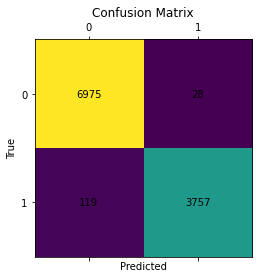

In [13]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(test_y, y_pred):
    """
    Given test_y and y_predictions, plot confusion matrix.
    """
    cm = confusion_matrix(test_y, y_pred)
    fig, ax = plt.subplots()
    ax.matshow(cm)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

    plt.show()
plot_confusion_matrix(test_y, prediction)

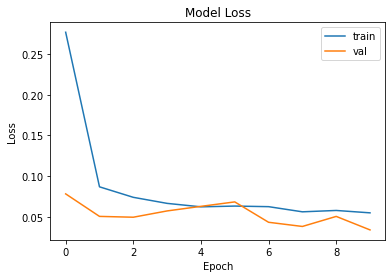

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc = 'upper right')
plt.show()

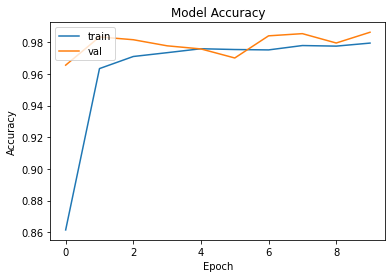

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 134, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 132, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 132, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 66, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        